In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import os

print(os.path.exists('OneDrive/Documents/upenndata/Module 6 Python APIs/cities.csv')) # Should return True if the file exists

In [2]:
# Load the data into a Pandas DataFrame
#df_market_data = pd.read_csv('OneDrive/Documents/crypto_market_data.csv')
df_market_data = pd.read_csv(r"C:\Users\Kehleboe\OneDrive\Documents\upenndata\Module 19 Unsupervised Learning\Starter_Code\Resources\crypto_market_data.csv")
# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [9]:
df_market_data_numeric = df_market_data.drop(columns=['coin_id'])
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Fit and transform the market data (excluding the index)
scaled_data = scaler.fit_transform(df_market_data_numeric)

In [11]:
# Create a DataFrame with the scaled data

df_market_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data_numeric.columns,  # Keep column names
    index=df_market_data_numeric.index       # Keep coin_id as index
)
# Copy the crypto names from the original DataFrame
df_market_scaled["coin_id"] = df_market_data_numeric.index


# Set the coin_id column as index
df_market_scaled.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [13]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

In [14]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

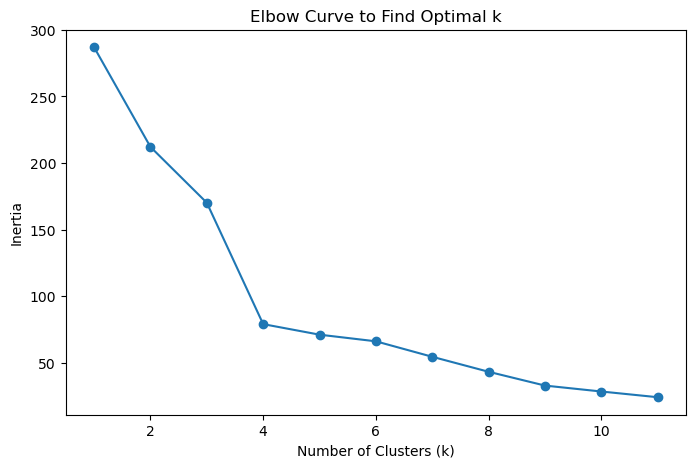

In [15]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Find Optimal k")

# Show the plot
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** The best value for k appears to be 4, based on the elbow method.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [16]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [17]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_scaled)

C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [19]:
# Create a copy of the scaled DataFrame
df_market_scaled_clusters = df_market_scaled.copy()

In [20]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_scaled_clusters["Cluster"] = cluster_labels

# Display the copy of the scaled DataFrame
df_market_scaled_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [21]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_scaled_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=500,
    title="Cryptocurrency Clusters Based on 24h and 7d Price Changes"
)








:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_scaled)
df_pca = pd.DataFrame(
    data=pca_data,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_scaled.index
)
# View the scaled PCA data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [24]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance Ratios:", explained_variance)

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()
print("Total Explained Variance:", total_explained_variance)

Explained Variance Ratios: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309841


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950 (or 89.50%).

In [25]:

# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(
    data=pca_data,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_scaled.index
)

# Copy the crypto names from the original scaled DataFrame
df_pca["coin_id"] = df_market_scaled.index

# Set the coin_id column as index
df_pca.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [26]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [27]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data using df_pca
    kmeans_pca.fit(df_pca)

    # Append the model's inertia_ to the inertia list
    inertia_pca.append(kmeans_pca.inertia_)


C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca.head()



,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


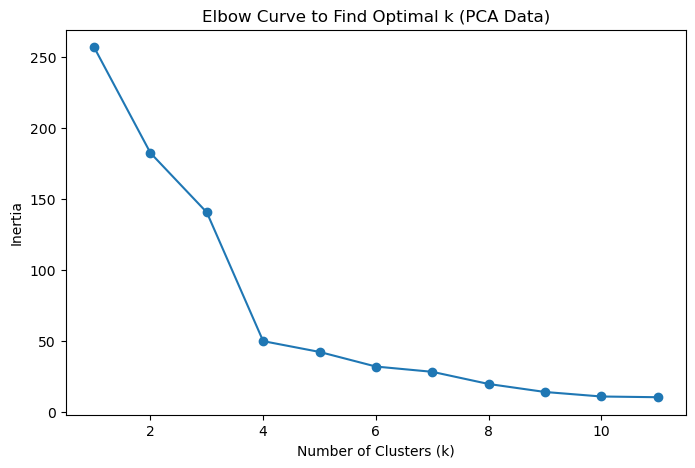

In [29]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the Elbow curve for PCA data
plt.figure(figsize=(8, 5))
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Find Optimal k (PCA Data)")

# Show the plot
plt.show()


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4, as identified from the elbow method using the PCA-transformed data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value remains 4, indicating that reducing the dimensions with PCA preserved the essential clustering structure.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [30]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [31]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

C:\Users\Kehleboe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_labels = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values
print(pca_cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [33]:
# Create a copy of the scaled PCA DataFrame
df_pca_clusters = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clusters["Cluster"] = pca_cluster_labels

# Display the copy of the scaled PCA DataFrame
df_pca_clusters.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,0
2,-0.433070,-0.168126,-0.641752,2
3,-0.471835,-0.222660,-0.479053,2
4,-1.157800,2.041209,1.859715,0


In [34]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=500,
    title="Cryptocurrency Clusters Based on PCA Components"
)


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [35]:
# Composite plot to contrast the Elbow curves
#YOUR CODE HERE!
# Create an Elbow curve comparison plot
elbow_plot = df_elbow.hvplot.line(
    x="k", y="inertia", label="Original Data", width=800, height=400, title="Elbow Curve Comparison"
) + df_elbow_pca.hvplot.line(
    x="k", y="inertia", label="PCA Data", color='red'
)

# Display the composite plot
elbow_plot

:Layout
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [36]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
cluster_plot = df_market_scaled_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters from Original Data"
) + df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters from PCA Data"
)

# Display the composite plot
cluster_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features with PCA simplifies clustering while preserving most of the data’s structure. PCA reduces noise, improves efficiency, and helps visualize clusters better. However, some minor details may be lost, leading to slight variations in cluster shapes. Overall, it optimizes K-Means by balancing accuracy and computational efficiency.